In [1]:
import plotly.graph_objects as go
import networkx as nx



test_name = "seq10f9s"

stat_path=f"../example_stat/{test_name}"
iamge_path=f"{stat_path}/images"



In [2]:
# My util libs
import utils.stat_loader as sload
import utils.stat_print as sp
import utils.vol_stat2graph as vol2g
import utils.vol_graph2sankey as vol2sk

# Improve Functions
## TODO
- (Maybe) Add adjustment of label to full label, file-task label, and no lables
- add VFD stats for file node
- Maps dataset y-axis with blob number as the position, x-axis with first access time

## Maybe
- add option to filter dataset nodes networkx graph (to reduce graph size)

## DONE
- DONE:Add task cutoff option for graphs
- Add task start option for graphs
    - Be careful about adding the required files??!!
- some read_only edges seems wrong direction (maybe `set_task_file_dset_pos`)

In [3]:
STAGE_START = 0
STAGE_END = 10


TASK_ORDER_LIST = sload.load_task_order_list(stat_path)
STAGE_END = sload.correct_end_stage(TASK_ORDER_LIST, STAGE_END)

TASK_ORDER_LIST = sload.current_task_order_list(TASK_ORDER_LIST, STAGE_START, STAGE_END)

TASK_LISTS = list(TASK_ORDER_LIST.keys())

print(f"TASK_ORDER_LIST = {TASK_ORDER_LIST}")
TASK_LISTS

STAGE_END is not in TASK_ORDER_LIST, set to max order: 8
TASK_ORDER_LIST = {'run_idfeature': 0, 'run_tracksingle': 1, 'run_gettracks': 2, 'run_trackstats': 3, 'run_identifymcs': 4, 'run_matchpf': 5, 'run_robustmcs': 6, 'run_mapfeature': 7, 'run_speed': 8}


['run_idfeature',
 'run_tracksingle',
 'run_gettracks',
 'run_trackstats',
 'run_identifymcs',
 'run_matchpf',
 'run_robustmcs',
 'run_mapfeature',
 'run_speed']

In [4]:
task_file_map = sload.load_task_file_map(stat_path, test_name, TASK_LISTS)


for task, stat in task_file_map.items():
    print(f"{task} : {stat}")


vol_files = sload.find_files_with_pattern(stat_path, "vol")
# vol_files = vol_files[0:1]
print(f"vol_files: {vol_files}")


vol_dict = sload.load_stat_yaml(vol_files)
# sp.print_file_stat(vol_dict)


print("loading yaml done")


task_file_map = {'run_idfeature-222745': {'input': ['/home/mtang11/experiments/flextrkr_runs/input_data/run_mcs_tbpfradar3d_wrf/wrfout_rainrate_tb_zh_mh_2015-05-06_00:00:00.nc', '/home/mtang11/experiments/flextrkr_runs/input_data/run_mcs_tbpfradar3d_wrf/wrfout_rainrate_tb_zh_mh_2015-05-06_01:00:00.nc', '/home/mtang11/experiments/flextrkr_runs/input_data/run_mcs_tbpfradar3d_wrf/wrfout_rainrate_tb_zh_mh_2015-05-06_02:00:00.nc', '/home/mtang11/experiments/flextrkr_runs/input_data/run_mcs_tbpfradar3d_wrf/wrfout_rainrate_tb_zh_mh_2015-05-06_03:00:00.nc', '/home/mtang11/experiments/flextrkr_runs/input_data/run_mcs_tbpfradar3d_wrf/wrfout_rainrate_tb_zh_mh_2015-05-06_04:00:00.nc', '/home/mtang11/experiments/flextrkr_runs/input_data/run_mcs_tbpfradar3d_wrf/wrfout_rainrate_tb_zh_mh_2015-05-06_05:00:00.nc', '/home/mtang11/experiments/flextrkr_runs/input_data/run_mcs_tbpfradar3d_wrf/wrfout_rainrate_tb_zh_mh_2015-05-06_06:00:00.nc', '/home/mtang11/experiments/flextrkr_runs/input_data/run_mcs_tbpfra

loading yaml done


In [5]:
# Show All VOL Tracker overhead
vol_dict = sload.load_stat_yaml(vol_files)
sp.show_all_overhead("VOL",vol_dict)

# stops here
exit(0)

loading ../example_stat/seq10f9s/222745-vol_data_stat.yaml
Total overhead: 20306916.0 ms


In [6]:
G_VOL = nx.DiGraph()
G_VOL = vol2g.add_task_dset_file_edges(G_VOL, vol_dict,TASK_LISTS)

# sp.display_all_nodes_attr(G_VOL)
# sp.print_edges(G_VOL)
# sp.draw_graph(G_VOL, test_name, graph_type="vol", prefix=f'{(STAGE_END+1)}s', save=True)

../example_stat/seq10f9s/222745-vol_data_stat.yaml


task_name: run_idfeature-222745, task_order: 0
node run_idfeature-222745 : {'pos': (2, 2), 'rpos': 0, 'order': 2, 'type': 'task'}, pos: (2, 2)
node : run_idfeature-222745, pos: (0, 0)
task_name: run_tracksingle-222745, task_order: 1
node run_tracksingle-222745 : {'pos': (2, 42), 'rpos': 0, 'order': 42, 'type': 'task'}, pos: (2, 42)
node : run_tracksingle-222745, pos: (3, 0)
task_name: run_gettracks-222745, task_order: 2
node run_gettracks-222745 : {'pos': (2, 132), 'rpos': 0, 'order': 132, 'type': 'task'}, pos: (2, 132)
node : run_gettracks-222745, pos: (6, 0)
task_name: run_trackstats-222745, task_order: 3
node run_trackstats-222745 : {'pos': (2, 2), 'rpos': 0, 'order': 2, 'type': 'task'}, pos: (2, 2)
node : run_trackstats-222745, pos: (9, 0)
task_name: run_identifymcs-222745, task_order: 4
node run_identifymcs-222745 : {'pos': (2, 222), 'rpos': 0, 'order': 222, 'type': 'task'}, pos: (2, 222)
node : run_identifymcs-222745, pos: (12, 0)
task_name: run_matchpf-222745, task_order: 5
node

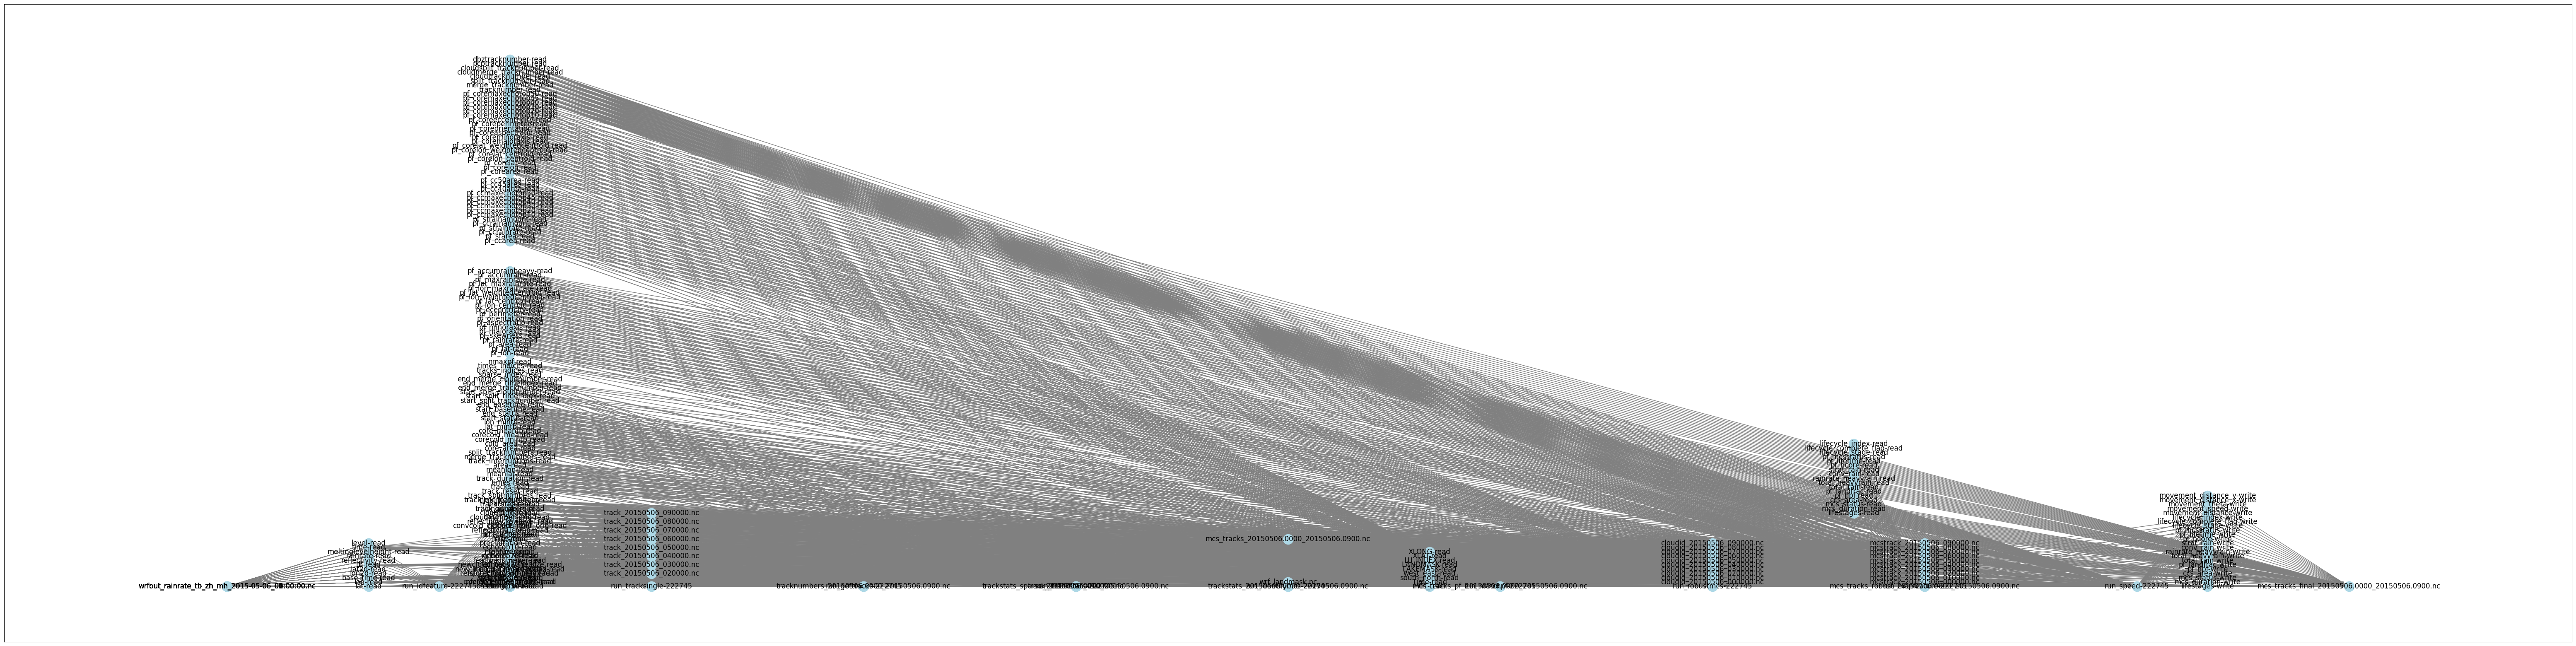

In [7]:
G_VOL = vol2g.set_task_position(G_VOL, task_file_map, STAGE_START)
# print(task_file_map)
G_VOL = vol2g.set_task_file_dset_pos(G_VOL, task_file_map)
sp.draw_graph(G_VOL, test_name, graph_type="vol", prefix=f'{(STAGE_END+1)}s', save=True)

# Add networkx to Sankey diagram

## Statistics for Sankey
Below are needed edge attributes before generating the sankey diagram:
- access_cnt : The total file/dataset access count 
- access_size : The total read and write access size
- operation : The operation type : read, write, read_write
- bandwidth : Get the per access size and time, then calculate the bandwidth. Average the bandwidth if multiple accesses. (TODO: currently only recording one access size and time)


In [ ]:
vol2sk.prepare_sankey_stat(G_VOL)


: 

In [ ]:
vol2sk.time_to_file_x_pos(G_VOL)

lifestages-write New pos:  (24.84285714285714, 0)
mcs_duration-write New pos:  (25.0, 1)
mcs_status-write New pos:  (24.985714285714284, 2)
ccs_area-write New pos:  (24.97142857142857, 3)
pf_npf-write New pos:  (24.957142857142856, 4)
pf_landfrac-write New pos:  (24.942857142857143, 5)
total_rain-write New pos:  (24.928571428571427, 6)
total_heavyrain-write New pos:  (24.914285714285715, 7)
rainrate_heavyrain-write New pos:  (24.9, 8)
conv_rain-write New pos:  (24.885714285714286, 9)
strat_rain-write New pos:  (24.87142857142857, 10)
pf_ncore-write New pos:  (24.857142857142858, 11)
pf_lifetime-write New pos:  (24.82857142857143, 12)
pf_mcsstatus-write New pos:  (24.814285714285713, 13)
lifecycle_stage-write New pos:  (24.8, 14)
lifecycle_complete_flag-write New pos:  (24.785714285714285, 15)
lifecycle_index-write New pos:  (24.771428571428572, 16)
movement_distance-write New pos:  (24.757142857142856, 17)
movement_speed-write New pos:  (24.742857142857144, 18)
movement_theta-write New

In [ ]:
vol_nodes, vol_nodes_dict = vol2sk.get_nodes_for_sankey(G_VOL, label_on=True)

# print(vol_nodes)

vol_links = vol2sk.get_links_for_sankey(G_VOL, vol_nodes_dict)
fig = go.Figure(go.Sankey(
            node = vol_nodes,
            link = vol_links, orientation='h'))



KeyboardInterrupt: 

In [ ]:
fig.update_layout(
    autosize=False,
    width=1200,
    height=400,
    margin=dict(
        l=100,
        r=100,
        b=100,
        t=200,
        pad=2
    ),
    font=dict(size=18),
)
fig.show()

saved_image_path = f"{stat_path}/vol-{(STAGE_END+1)}s-{test_name}-sankey.html"

fig.write_html(saved_image_path)
print(f"saved to : {saved_image_path}")

saved to : ../example_stat/arldm_fls/vol-2s-arldm_fls-sankey.html


In [ ]:
DATASET_LIMIT = 10

for node, node_attr in vol_nodes.items():
    print(f"{node} : {node_attr}")

print()

vol_nodes_new_dict = {}
dset_count = 0

for node, attr in vol_nodes_dict.items():    
    vol_nodes_new_dict[node] = attr
    # print(f"{node} : {attr}")
    if attr['type'] == 'dataset':
        dset_count+=1
    if dset_count >= DATASET_LIMIT:
        break

print()
        
for node, attr in vol_nodes_new_dict.items():
    print(f"{node} : {attr}")

# get index of selected nodes
wanted_nodes_index = []
for idx, node in enumerate(vol_nodes['label']):
    if node in vol_nodes_new_dict.keys():
        wanted_nodes_index.append(idx)

print(f"wanted_nodes_index: {wanted_nodes_index}")

# select wanted nodes with attributes
vol_new_nodes = {}
for key, val in vol_nodes.items():
    vol_new_nodes[key] = [val[i] for i in wanted_nodes_index]

print(f"New nodes: ")
for node, node_attr in vol_new_nodes.items():
    print(f"{node} : {node_attr}")

# # select wanted links with attributes
# vol_new_links = {}
# for key, val in vol_links.items():
#     vol_new_links[key] = [val[i] for i in wanted_nodes_index]

# print(f"New links: ")
# for link, attr in vol_new_links.items():
#     print(f"{link} : {attr}")



label : ['arldm_saveh5-1119693', 'image4-write', 'vistsis_out.h5', 'image3-write', 'image2-write', 'image1-write', 'image0-write', 'sis-write', 'dii-write', 'flintstones_out.h5', 'text-read', 'arldm_train-1119701', 'image0-read', 'arldm_train-1119784', 'image1-read', 'image2-read', 'image3-read', 'image4-read', 'arldm_train-1119827']
color : ['Red', 'Gold', 'MediumBlue', 'Gold', 'Gold', 'Gold', 'Gold', 'Gold', 'Gold', 'MediumBlue', 'Gold', 'Red', 'Gold', 'Red', 'Gold', 'Gold', 'Gold', 'Gold', 'Red']
x : [0.0, 0.3333333333333333, 1.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0, 0.6666666666666666, 1.0, 0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0]
y : [0.01, 0.01, 0.01, 0.17500000000000002, 0.34, 0.5049999999999999, 0.67, 0.8350000000000001, 0.9999999999999999, 0.34, 0.01, 0.01, 0.17500000000000002, 0.17500000000000002, 0.34, 0.5049999999999999

In [ ]:
vol_new_links = vol2sk.get_links_for_sankey(G_VOL, vol_nodes_new_dict, val_sqrt=False)

fig = go.Figure(go.Sankey(
            node = vol_new_nodes,
            link = vol_new_links, orientation='h'))

fig.update_layout(
    autosize=False,
    width=1000,
    height=400,
    margin=dict(
        l=10,
        r=50,
        b=50,
        t=100,
    ),
    font=dict(size=18),
)
fig.show()

saved_image_path = f"{stat_path}/vol-{(STAGE_END+1)}s-{test_name}-sankey-{DATASET_LIMIT}dset.html"

fig.write_html(saved_image_path)
print(f"saved to : {saved_image_path}")

bandwidth range: 0 ~ 0


saved to : ../example_stat/arldm_fls/vol-2s-arldm_fls-sankey-10dset.html


loading ../example_stat/arldm_fls/1119693_vol-data-stat-dl.yaml
loading ../example_stat/arldm_fls/1119701_vol-data-stat-dl.yaml
Total overhead: 887.0 ms
